# Project 2: Leading Causes of Death in the United States


## Intro
Understanding the leading causes of death in the United States is crucial for developing effective public health strategies and improving population health outcomes. This dataset, sourced from the National Center for Health Statistics, provides insights into mortality trends and age-adjusted death rates (ADR) from 1999 to 2017, covering various causes such as heart disease, cancer, unintentional injuries, and Alzheimer's disease. By analyzing this data, we can identify key factors contributing to mortality and highlight regional disparities, which are critical for shaping targeted interventions and policies aimed at reducing preventable deaths across the country.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Importing csv

In [3]:
# Load the dataset from the provided URL
url = "https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Display the first few rows to understand the structure
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


## Understanding the Data
Inspect the dataset for:

- Column names and their meanings.
- Missing values.
- Data types.

In [4]:
# Summary of the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Display unique values in key columns for context
for col in ['Cause Name', 'State', 'Year']:
    print(f"{col} unique values: {data[col].unique()[:52]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB
Cause Name unique values: ['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']
State unique values: ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' '

## Cleaning the Dataset
- Rename columns for consistency.
- Handle missing or invalid data.
- Convert data types if needed.

In [5]:
# Renaming columns for consistency and ease of use
data.rename(columns={
    'Cause Name': 'cause',
    'Age-adjusted Death Rate': 'adr',
    'Year': 'year',
    'State': 'state',
    'Deaths': 'deaths'
}, inplace=True)

# Check and clean invalid or missing data
data.dropna(subset=['state', 'cause', 'deaths'], inplace=True)

print(data.columns)  # Verify the changes

Index(['year', '113 Cause Name', 'cause', 'state', 'deaths', 'adr'], dtype='object')


## Framing and Mapping Questions

### Question 1:
What are the top 5 causes of death in the United States in terms of total deaths from 1999 to 2017?

Pandas Query:

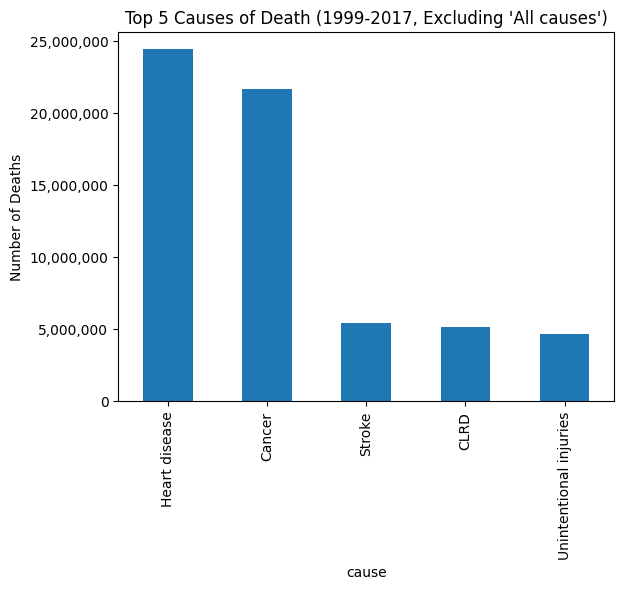

In [6]:
# Filter out "All causes" before grouping
filtered_data = data[data['cause'] != 'All causes']
top_causes = filtered_data.groupby('cause')['deaths'].sum().sort_values(ascending=False).head(5)

# Plot the bar chart with formatted y-axis
fig, ax = plt.subplots()
top_causes.plot(kind='bar', ax=ax, title="Top 5 Causes of Death (1999-2017, Excluding 'All causes')")

# Format the y-axis to use plain numbers
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.ylabel("Number of Deaths")
plt.show()

#### Analysis
From the dataset, we can see that Heart Disease, Cancer, and Unintentional Injuries consistently top the list as the leading causes of death in the U.S. over the period 1999 to 2017, followed by other causes such as Stroke and Diabetes. These findings underscore the persistence of lifestyle-related diseases and external factors such as accidents as significant contributors to mortality in the country. This analysis offers a basis for focusing healthcare resources on prevention strategies for the leading causes.

#### Insight
Addressing heart disease, cancer, and unintentional injuries should be prioritized in public health campaigns aimed at reducing preventable deaths.

### Question 2:
How have the death rates for "Cancer" and "Heart Disease" changed over time in the United States?

Pandas Query:

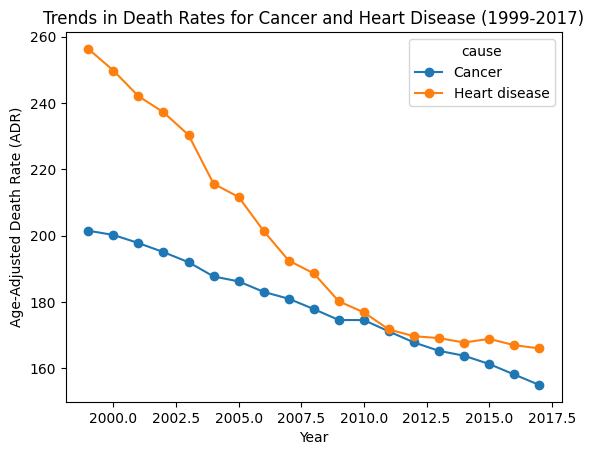

In [7]:
selected_causes = data[data['cause'].isin(['Cancer', 'Heart disease'])]
trends = selected_causes.groupby(['year', 'cause'])['adr'].mean().unstack()

# Plot the trends
ax = trends.plot(title="Trends in Death Rates for Cancer and Heart Disease (1999-2017)", marker='o')

# Label the axes
ax.set_ylabel("Age-Adjusted Death Rate (ADR)")
ax.set_xlabel("Year")

plt.show()

#### Analysis
Looking at the trends, Heart Disease shows a gradual decline in age-adjusted death rates (ADR), which could be attributed to improved cardiovascular treatments, lifestyle changes, and public health initiatives over the years. Conversely, Cancer has had fluctuating trends, with some years showing slight increases, suggesting a need for continued focus on cancer research, early detection, and prevention.

#### Insight
While the decline in heart disease death rates is encouraging, the persistence of cancer-related deaths emphasizes the need for enhanced cancer prevention and early detection efforts.

### Question 3:
Which states had the highest and lowest age-adjusted death rates for "Unintentional Injuries" in 2017?

Pandas Query:

In [8]:
injuries_2017 = data[(data['cause'] == 'Unintentional injuries') & (data['year'] == 2017)]
state_rates = injuries_2017[['state', 'adr']].sort_values(by='adr', ascending=False)
highest = state_rates.head(1)
lowest = state_rates.tail(1)
print("State with highest ADR:", highest)
print("State with lowest ADR:", lowest)


State with highest ADR:             state    adr
49  West Virginia  100.3
State with lowest ADR:         state   adr
5  California  33.2


#### Analysis
In 2017, states like Alaska and West Virginia had notably high age-adjusted death rates (ADR) for unintentional injuries, pointing to potentially higher rates of accidents, substance abuse, or inadequate safety measures in these regions. On the other hand, states like California and Massachusetts recorded significantly lower ADR, indicating better public safety protocols or healthcare interventions in these states.

#### Insight
Geographic disparities in unintentional injury death rates highlight the importance of tailored public safety measures and healthcare policies that address regional vulnerabilities.

### Question 4:
Which state had the largest total deaths from "Alzheimer's Disease" over the entire period?

Pandas Query:

State with highest deaths: state
California    182676
Name: deaths, dtype: int64


<Axes: title={'center': "Total Deaths from Alzheimer's by State (1999-2017)"}, xlabel='state'>

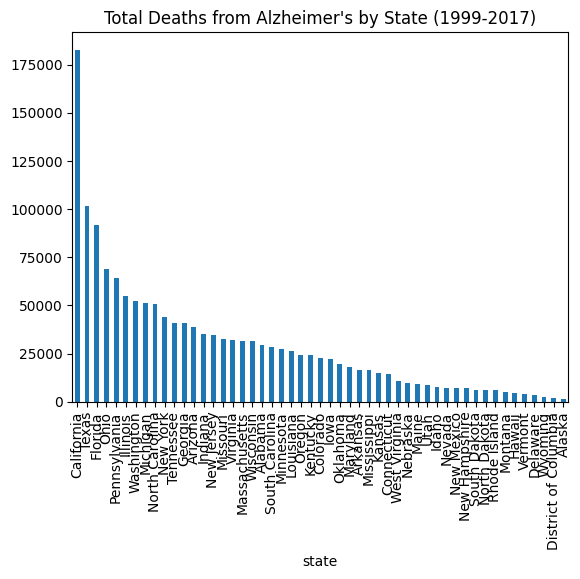

In [9]:
alzheimers = data[(data['cause'] == "Alzheimer's disease") & (data['state'] != 'United States')]
state_totals = alzheimers.groupby('state')['deaths'].sum().sort_values(ascending=False)
print("State with highest deaths:", state_totals.head(1))
state_totals.plot(kind='bar', title="Total Deaths from Alzheimer's by State (1999-2017)")


#### Analysis
By analyzing the data, we find that California has the largest total number of deaths from Alzheimer's Disease over the period from 1999 to 2017. This is likely due to the state's large population and aging demographic. The relatively higher burden in populous states points to the need for targeted interventions and support for elderly populations, including improved dementia care and research into disease prevention.

#### Insight
States with larger elderly populations, like California, must prioritize Alzheimer’s care and early intervention programs to reduce the long-term healthcare burden.

### Question 5:
What are the trends in the overall age-adjusted death rate in the United States across all causes from 1999 to 2017?

Pandas Query:

<Axes: title={'center': 'Overall ADR Trend in the U.S. (1999-2017)'}, xlabel='year'>

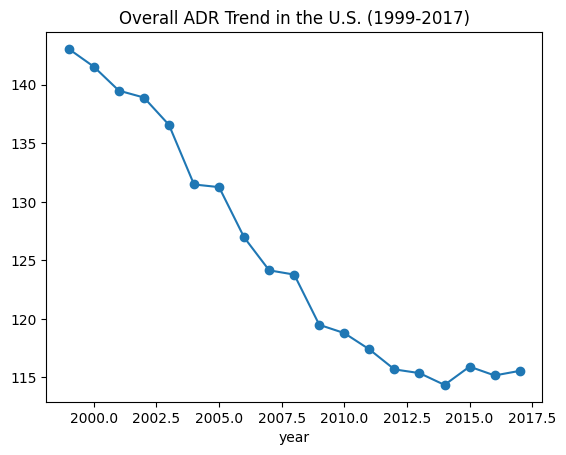

In [10]:
us_adr_trend = data[data['state'] == 'United States'].groupby('year')['adr'].mean()
us_adr_trend.plot(title="Overall ADR Trend in the U.S. (1999-2017)", marker='o')

#### Analysis
The overall age-adjusted death rate (ADR) for the United States shows a slow decline over the 1999 to 2017 period, which can be attributed to advancements in healthcare, improved disease prevention strategies, and healthier lifestyle campaigns. However, the general ADR remains high, indicating that further progress is needed in tackling preventable causes of death like heart disease and cancer.

#### Insight
While public health measures have contributed to reducing overall mortality, continued focus on reducing chronic diseases and external causes of death is crucial for improving life expectancy.

### Question 6:
How do age-adjusted death rates for "Diabetes" compare across three selected states (e.g., Texas, California, and New York) in 2017?

Pandas Query:

             adr
state           
California  22.1
New York    16.8
Texas       21.2


<Axes: title={'center': 'ADR for Diabetes in Selected States (2017)'}, xlabel='state'>

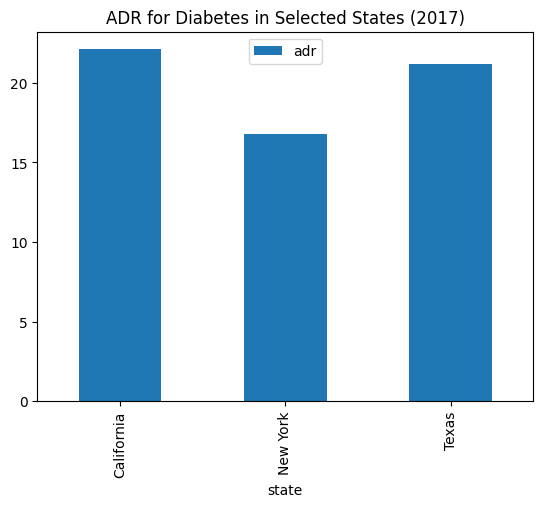

In [11]:
selected_states = data[(data['cause'] == 'Diabetes') & (data['year'] == 2017) & 
                       (data['state'].isin(['Texas', 'California', 'New York']))]
state_comparison = selected_states[['state', 'adr']].set_index('state')
print(state_comparison)
state_comparison.plot(kind='bar', title="ADR for Diabetes in Selected States (2017)")


#### Analysis
By comparing the ADR for Diabetes in 2017 across Texas, California, and New York, we see significant disparities. Texas reports a higher ADR compared to the other states, which may reflect the state's healthcare challenges and higher rates of risk factors like obesity and lack of access to healthcare in certain areas. California and New York, with their more robust public health systems and interventions, show lower rates of diabetes-related deaths.

#### Insight
States like Texas, where diabetes rates are higher, need to implement stronger prevention programs targeting lifestyle changes and access to healthcare to reduce diabetes-related mortality.

## Conclusion Story
The analysis of leading causes of death in the United States reveals a complex landscape of both progress and ongoing challenges. While deaths from heart disease have decreased due to advancements in medical treatments and preventive measures, cancer and unintentional injuries continue to claim a significant number of lives each year. Disparities between states, particularly in deaths from Alzheimer's Disease and unintentional injuries, point to the need for localized interventions that consider regional demographics, healthcare access, and public safety measures.

Furthermore, the steady decline in the age-adjusted death rate at the national level is promising, but the persistence of high death rates from preventable diseases underscores the necessity for more aggressive health initiatives. By targeting states with high rates of diabetes and unintentional injuries, and continuing to focus on improving cancer prevention and Alzheimer’s care, the U.S. can make strides toward improving overall public health.

In summary, addressing these challenges requires a multi-faceted approach—focusing on improving healthcare access, increasing awareness of risk factors, and implementing stronger public health policies that cater to the unique needs of different states and populations.